#MAJOR PROJECT PART-2 (2)
DATA ANALYTICS TOWARDS MONITORING THE IMPACT OF MOBILE PHONE ON USER HEALTH AND USER MOBILE RECOMMENDATION USING SENTIMENT ANALYSIS

##Enrollment Number: 19103048
##Name of Student: RITIK RUSTAGI
##Name of Supervisor: Dr. Ankit Vidyarthi


#JAYPEE INSTITUTE OF INFORMATION TECHNOLOGY, NOIDA

In [ ]:
!python --version

Python 3.9.16


# CLEANING DATA FOR MODELLING

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
raw_df = pd.read_csv('Responses.csv')

In [ ]:
from datetime import datetime, date
def age_calculate(born):
  born = datetime.strptime(born, "%d/%m/%Y").date()
  today = date.today()
  return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [ ]:
import numpy as np
bins = [0.1, 0.34, 0.60, 1.68, np.inf]
names = ['L1 (less than 0.34)', 'L2 (between 0.34 and 0.60)', 'L3(between 0.60 and 1.68)', 'Harmful (Greater than 1.68)']

In [ ]:
raw_df['Date of Birth'] = raw_df['Date of Birth'].apply(age_calculate)
raw_df.rename(columns = {'Date of Birth' : 'Age'}, inplace = True)

In [ ]:
raw_df.head()

,Timestamp,Gender,Age,Mobile Phone Brand,iPhone Model,Mobile Phone Model,Mobile Phone Model.1,Mobile Phone Model.2,Mobile Phone Model.3,Mobile Phone Model.4,...,Distance between eyes and mobile screen while using,Do you use your mobile in low light conditions?,Where do you generally keep your phone?,Where do you keep your mobile while sleeping?,Do you also use device such as fitness band or smart watch?,Do you wear spectacles?,Any recurring health issues (choose all that apply),General posture while using mobile,Head W/kg(1g),Body W/kg(1g)
0,12/10/2022 22:25:10,Male,21,Oneplus,NaN,NaN,NaN,NORD CE,NaN,NaN,...,one hand,Yes,Front Trouser Pocket,far from me,No,Yes,Sleeplessness,Laying,1.190,1.060
1,12/10/2022 22:35:30,Male,22,Oneplus,NaN,NaN,NaN,7T,NaN,NaN,...,half hand,Yes,Front Trouser Pocket,near to me,Yes,Yes,"Hand or Neck pain, Impulsiveness","Leaning, Laying",1.060,0.930
2,12/10/2022 22:46:25,Male,23,Samsung,NaN,NaN,NaN,NaN,NaN,NaN,...,half hand,Yes,Front Trouser Pocket,near to me,No,No,Nil,"Sitting, Leaning, Laying",0.836,0.000
3,12/10/2022 22:58:30,Male,22,Oneplus,NaN,NaN,NaN,Nord 2,NaN,NaN,...,one hand,Yes,Front Trouser Pocket,near to me,No,No,None,"Sitting, Leaning, Laying",1.140,1.150
4,12/10/2022 23:01:23,Male,22,Realme,NaN,NaN,NaN,NaN,NaN,NaN,...,half hand,Yes,Front Trouser Pocket,near to me,No,Yes,"Headache, Earache, Eyes strain, Sleeplessness",Laying,1.159,0.739


In [ ]:
raw_df.drop(['Timestamp', 'Mobile Phone Model.6'], inplace=True, axis=1)
raw_df['Model'] = pd.Series(raw_df.iloc[:,3:13].fillna('').values.tolist()).str.join('')
raw_df.drop(raw_df.iloc[:,3:15], inplace=True, axis=1)
raw_df.drop(['Internet access mode?', 'Average data consumption in a day?', 'Where do you generally keep your phone?', 'Where do you keep your mobile while sleeping?', 'Do you also use device such as fitness band or smart watch?', 'General posture while using mobile', 'Body W/kg(1g)', 'Model'], inplace=True, axis=1)
raw_df.drop(['Do you wear spectacles? '], inplace=True, axis=1)
raw_df['Head'] = pd.cut(raw_df['Head W/kg(1g)'], bins, labels=names)
raw_df.drop(['Head W/kg(1g)'], inplace=True, axis=1)

In [ ]:
# raw_df.drop(['Age'], inplace=True, axis=1)

In [ ]:
raw_ind_df=raw_df.copy()

#OVERALL HEALTH

In [ ]:
raw_df['Health Issues'] = ['No' if i == 'None' else 'Yes' for i in raw_df['Any recurring health issues (choose all that apply)']]
raw_df.drop(['Any recurring health issues (choose all that apply)'], inplace=True, axis=1)

In [ ]:
raw_df.head()

,Gender,Age,Mobile Phone Brand,Mobile Phone Usage (in hours),Average time spent over calling (in a day),Average time spent in gaming (in a day),Average time spent on Social Media (in a day),Average time spent playing videos (in a day),Average time spent in productive work (in a day),Preferred Screen Brightness Level,Preferred theme,Preferred Alert Mode,Do you set Alarm on mobile?,Do you use your mobile just before going to bed?,Do you use your mobile phone just after waking up?,Distance between eyes and mobile screen while using,Do you use your mobile in low light conditions?,Head,Health Issues
0,Male,21,Oneplus,between 2 and 4,30 minute,20 minutes,30 minutes,2 hours,1 hour or more,Medium,Dark,Vibrate,Yes,Yes,Yes,one hand,Yes,L3(between 0.60 and 1.68),Yes
1,Male,22,Oneplus,between 4 and 6,30 minute,not at all,30 minutes,2 hours,30 minutes,Medium,Light,Ring,Yes,Yes,Yes,half hand,Yes,L3(between 0.60 and 1.68),Yes
2,Male,23,Samsung,between 2 and 4,15 minutes,not at all,1 hour,30 minutes,1 hour or more,Medium,Dark,Silent,Yes,Yes,Yes,half hand,Yes,L3(between 0.60 and 1.68),Yes
3,Male,22,Oneplus,between 4 and 6,5 minutes,2 hours,4 hours,6 hours,not at all,Medium,Light,Ring,Yes,Yes,Yes,one hand,Yes,L3(between 0.60 and 1.68),No
4,Male,22,Realme,between 2 and 4,15 minutes,20 minutes,2 hours,1 hour,30 minutes,Low,Dark,Ring,Yes,Yes,Yes,half hand,Yes,L3(between 0.60 and 1.68),Yes


In [ ]:
features= ['Gender',
       'Age',
       'Mobile Phone Brand',
       'Head',
       'Mobile Phone Usage (in hours)',
       'Average time spent over calling (in a day)',
       'Average time spent in gaming (in a day)',
       'Average time spent on Social Media (in a day)',
       'Average time spent playing videos (in a day)',
       'Average time spent in productive work (in a day)',
       'Preferred Screen Brightness Level',
       'Preferred theme',
       'Preferred Alert Mode',
       'Do you set Alarm on mobile?',
       'Do you use your mobile just before going to bed?',
       'Do you use your mobile phone just after waking up?',
       'Distance between eyes and mobile screen while using',
       'Do you use your mobile in low light conditions?'
       ]

In [ ]:
new_df= pd.get_dummies(raw_df, columns= features)

print(raw_df.shape)
print(new_df.shape)

(292, 19)
(292, 106)


In [ ]:
new_df.head()

,Health Issues,Gender_Female,Gender_Male,Age_16,Age_17,Age_18,Age_19,Age_20,Age_21,Age_22,...,Do you set Alarm on mobile?_Yes,Do you use your mobile just before going to bed?_No,Do you use your mobile just before going to bed?_Yes,Do you use your mobile phone just after waking up?_No,Do you use your mobile phone just after waking up?_Yes,Distance between eyes and mobile screen while using_close,Distance between eyes and mobile screen while using_half hand,Distance between eyes and mobile screen while using_one hand,Do you use your mobile in low light conditions?_No,Do you use your mobile in low light conditions?_Yes
0,Yes,0,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,1,0,1
1,Yes,0,1,0,0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
2,Yes,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
3,No,0,1,0,0,0,0,0,0,1,...,1,0,1,0,1,0,0,1,0,1
4,Yes,0,1,0,0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1


In [ ]:
new_df['Health Issues'][new_df['Health Issues'] == 'Yes'] = 1
new_df['Health Issues'][new_df['Health Issues'] == 'No'] = 0

<ipython-input-16-251acfc26695>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Health Issues'][new_df['Health Issues'] == 'Yes'] = 1
<ipython-input-16-251acfc26695>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Health Issues'][new_df['Health Issues'] == 'No'] = 0


In [ ]:
new_df.head()

,Health Issues,Gender_Female,Gender_Male,Age_16,Age_17,Age_18,Age_19,Age_20,Age_21,Age_22,...,Do you set Alarm on mobile?_Yes,Do you use your mobile just before going to bed?_No,Do you use your mobile just before going to bed?_Yes,Do you use your mobile phone just after waking up?_No,Do you use your mobile phone just after waking up?_Yes,Distance between eyes and mobile screen while using_close,Distance between eyes and mobile screen while using_half hand,Distance between eyes and mobile screen while using_one hand,Do you use your mobile in low light conditions?_No,Do you use your mobile in low light conditions?_Yes
0,1,0,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,1,0,1
1,1,0,1,0,0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
2,1,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
3,0,0,1,0,0,0,0,0,0,1,...,1,0,1,0,1,0,0,1,0,1
4,1,0,1,0,0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1


In [ ]:
new_df.isnull().values.any()

False

#FEATURE SELECTION

In [ ]:
# Split the data into X & y

X = new_df.drop('Health Issues', axis = 1).values
y = new_df['Health Issues']

y = y.astype(int)

print(X.shape)
print(y.shape)

(292, 105)
(292,)


In [ ]:
# Run a Tree-based estimator (i.e. decision trees & random forests)
dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [ ]:
# Running Feature Importance

fi_col = []
fi = []

for i,column in enumerate(new_df.drop('Health Issues', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))

    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for Gender_Female is : 0.0
The feature importance for Gender_Male is : 0.022952173577046
The feature importance for Age_16 is : 0.0
The feature importance for Age_17 is : 0.0
The feature importance for Age_18 is : 0.0
The feature importance for Age_19 is : 0.0
The feature importance for Age_20 is : 0.05204943848038741
The feature importance for Age_21 is : 0.010539333695382848
The feature importance for Age_22 is : 0.024644759246859962
The feature importance for Age_23 is : 0.0
The feature importance for Age_24 is : 0.024045860664182187
The feature importance for Age_25 is : 0.0
The feature importance for Age_26 is : 0.0
The feature importance for Age_27 is : 0.0
The feature importance for Age_28 is : 0.0
The feature importance for Age_29 is : 0.0
The feature importance for Age_30 is : 0.0
The feature importance for Age_31 is : 0.0
The feature importance for Age_32 is : 0.0
The feature importance for Age_34 is : 0.014964716526861412
The feature importance for Age

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
# Creating a Dataframe
fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])

# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:38]

fi_df

,index,Feature,Feature Importance
0,6,Age_20,0.052049
1,48,Mobile Phone Usage (in hours)_less than 2,0.043222
2,50,Average time spent over calling (in a day)_15 ...,0.037370
3,53,Average time spent over calling (in a day)_5 m...,0.035619
4,74,Average time spent playing videos (in a day)_1...,0.033382
5,49,Average time spent over calling (in a day)_1 hour,0.032681
6,36,Mobile Phone Brand_Realme,0.031806
7,58,Average time spent in gaming (in a day)_10 min...,0.031217
8,87,Preferred Screen Brightness Level_Medium,0.028317
9,54,Average time spent over calling (in a day)_mor...,0.026963


#SPLITTING THE DATA

In [ ]:
# Printing the shapes

print(new_df.shape)
print(new_df[columns_to_keep].shape)

(292, 106)
(292, 38)


In [ ]:
X = new_df[columns_to_keep].values

y = new_df['Health Issues']
y = y.astype(int)

print(X.shape)
print(y.shape)

(292, 38)
(292,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(233, 38)
(59, 38)
(233,)
(59,)


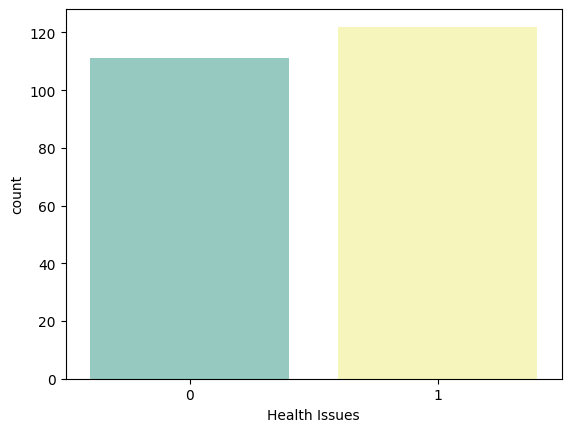

In [ ]:
# Investigating the distribution of all y's

ax = sns.countplot(x = y_train, palette = "Set3")

### Dataset is imbalanced, so we will balance it.

#BALANCING THE DATASET

### RANDOM OVERSAMPLING

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority")
X_res, y_res = ros.fit_resample(X_train, y_train)

In [ ]:
y_res.value_counts()

1    122
0    122
Name: Health Issues, dtype: int64

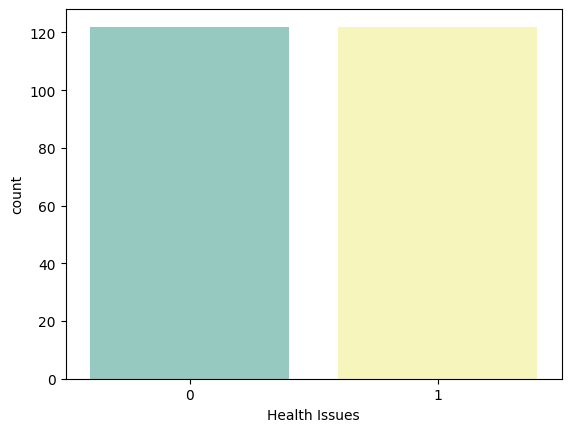

In [ ]:
ax = sns.countplot(x = y_res, palette = "Set3")

#APPLYING MACHINE LEARNING MODELS

In [ ]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

#EVALUATING METRICS

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():

    # Fit the classifier model
    models[key].fit(X_res, y_res)

    # Prediction
    predictions = models[key].predict(X_test)

    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [ ]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.440678,0.392857,0.407407
Support Vector Machines,0.491525,0.500000,0.466667
Decision Trees,0.491525,0.500000,0.466667
Random Forest,0.508475,0.500000,0.482759
K-Nearest Neighbor,0.559322,0.535714,0.535714


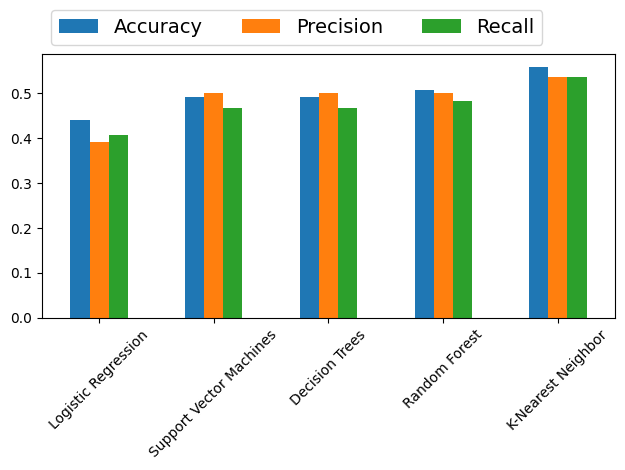

In [ ]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

#Individual Health Condition

In [ ]:
temp = raw_ind_df.copy()
# raw_ind_df = temp.copy()

# Headache

In [ ]:
raw_ind_df['Individual'] = raw_ind_df['Any recurring health issues (choose all that apply)'].str.contains('Headache', case=False, na=False).astype(int)
raw_ind_df.drop(['Any recurring health issues (choose all that apply)'], inplace=True, axis=1)

In [ ]:
new_ind_df= pd.get_dummies(raw_ind_df, columns= features)

X = new_ind_df.drop('Individual', axis = 1).values
y = new_ind_df['Individual']
y = y.astype(int)

dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

fi_col = []
fi = []

for i,column in enumerate(new_ind_df.drop('Individual', axis = 1)):
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])

fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

columns_to_keep = fi_df['Feature'][0:38]

X = new_ind_df[columns_to_keep].values

y = new_ind_df['Individual']
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority")
X_res, y_res = ros.fit_resample(X_train, y_train)

models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():

    # Fit the classifier model
    models[key].fit(X_res, y_res)

    # Prediction
    predictions = models[key].predict(X_test)

    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.677966,0.400000,0.3750
Support Vector Machines,0.677966,0.400000,0.3750
Decision Trees,0.711864,0.466667,0.4375
Random Forest,0.644068,0.066667,0.1250
K-Nearest Neighbor,0.627119,0.600000,0.3600


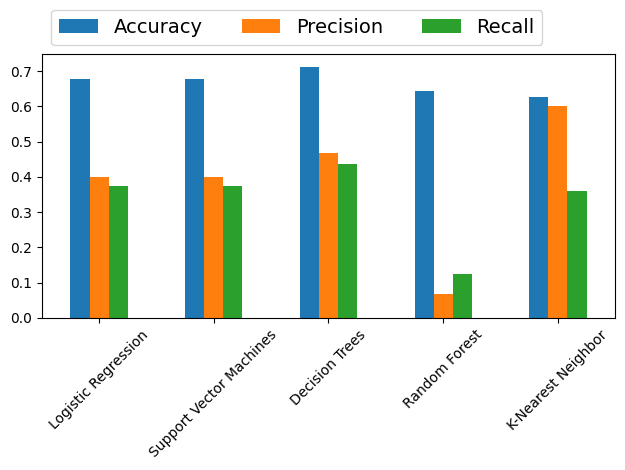

In [ ]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

# Earache

In [ ]:
raw_ind_df = temp.copy()

In [ ]:
raw_ind_df['Individual'] = raw_ind_df['Any recurring health issues (choose all that apply)'].str.contains('Earache', case=False, na=False).astype(int)
raw_ind_df.drop(['Any recurring health issues (choose all that apply)'], inplace=True, axis=1)

In [ ]:
new_ind_df= pd.get_dummies(raw_ind_df, columns= features)

X = new_ind_df.drop('Individual', axis = 1).values
y = new_ind_df['Individual']
y = y.astype(int)

dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

fi_col = []
fi = []

for i,column in enumerate(new_ind_df.drop('Individual', axis = 1)):
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])

fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

columns_to_keep = fi_df['Feature'][0:38]

X = new_ind_df[columns_to_keep].values

y = new_ind_df['Individual']
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority")
X_res, y_res = ros.fit_resample(X_train, y_train)

models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():

    # Fit the classifier model
    models[key].fit(X_res, y_res)

    # Prediction
    predictions = models[key].predict(X_test)

    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test, average='weighted')
    recall[key] = recall_score(predictions, y_test, average='weighted')

import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy,Precision,Recall
Logistic Regression,0.915254,0.867914,0.915254
Support Vector Machines,0.932203,0.900058,0.932203
Decision Trees,0.898305,0.836353,0.898305
Random Forest,0.983051,1.000000,0.983051
K-Nearest Neighbor,0.949153,0.932788,0.949153


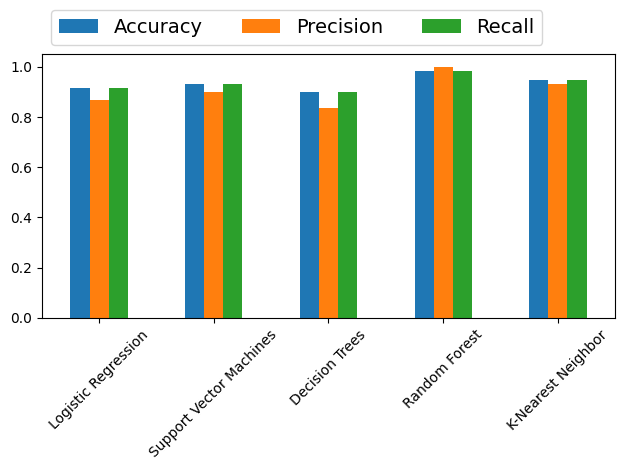

In [ ]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

#Eyestrain

In [ ]:
raw_ind_df = temp.copy()

In [ ]:
raw_ind_df['Individual'] = raw_ind_df['Any recurring health issues (choose all that apply)'].str.contains('Eyes strain', case=False, na=False).astype(int)
raw_ind_df.drop(['Any recurring health issues (choose all that apply)'], inplace=True, axis=1)

In [ ]:
new_ind_df= pd.get_dummies(raw_ind_df, columns= features)

X = new_ind_df.drop('Individual', axis = 1).values
y = new_ind_df['Individual']
y = y.astype(int)

dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

fi_col = []
fi = []

for i,column in enumerate(new_ind_df.drop('Individual', axis = 1)):
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])

fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

columns_to_keep = fi_df['Feature'][0:38]

X = new_ind_df[columns_to_keep].values

y = new_ind_df['Individual']
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority")
X_res, y_res = ros.fit_resample(X_train, y_train)

models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():

    # Fit the classifier model
    models[key].fit(X_res, y_res)

    # Prediction
    predictions = models[key].predict(X_test)

    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.610169,0.3750,0.315789
Support Vector Machines,0.610169,0.3750,0.315789
Decision Trees,0.542373,0.1875,0.176471
Random Forest,0.661017,0.1875,0.300000
K-Nearest Neighbor,0.406780,0.5000,0.228571


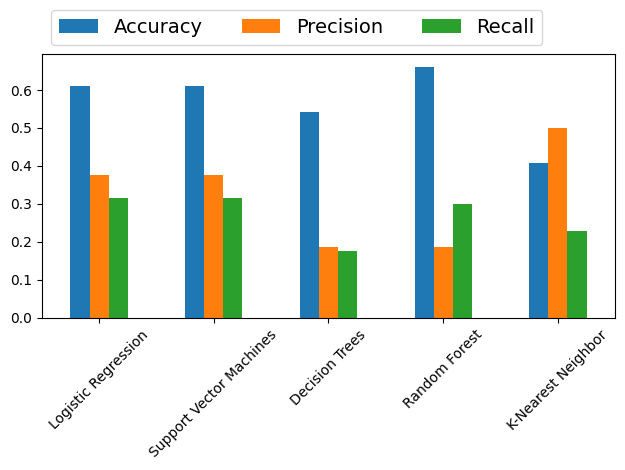

In [ ]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

#Impulsiveness

In [ ]:
raw_ind_df = temp.copy()

In [ ]:
raw_ind_df['Individual'] = raw_ind_df['Any recurring health issues (choose all that apply)'].str.contains('Impulsiveness', case=False, na=False).astype(int)
raw_ind_df.drop(['Any recurring health issues (choose all that apply)'], inplace=True, axis=1)

In [ ]:
new_ind_df= pd.get_dummies(raw_ind_df, columns= features)

X = new_ind_df.drop('Individual', axis = 1).values
y = new_ind_df['Individual']
y = y.astype(int)

dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

fi_col = []
fi = []

for i,column in enumerate(new_ind_df.drop('Individual', axis = 1)):
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])

fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

columns_to_keep = fi_df['Feature'][0:38]

X = new_ind_df[columns_to_keep].values

y = new_ind_df['Individual']
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority")
X_res, y_res = ros.fit_resample(X_train, y_train)

models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():

    # Fit the classifier model
    models[key].fit(X_res, y_res)

    # Prediction
    predictions = models[key].predict(X_test)

    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test,average='weighted')
    recall[key] = recall_score(predictions, y_test,average='weighted')

import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.796610,0.684805,0.796610
Support Vector Machines,0.847458,0.773119,0.847458
Decision Trees,0.932203,0.932203,0.932203
Random Forest,0.949153,0.965804,0.949153
K-Nearest Neighbor,0.728814,0.575379,0.728814


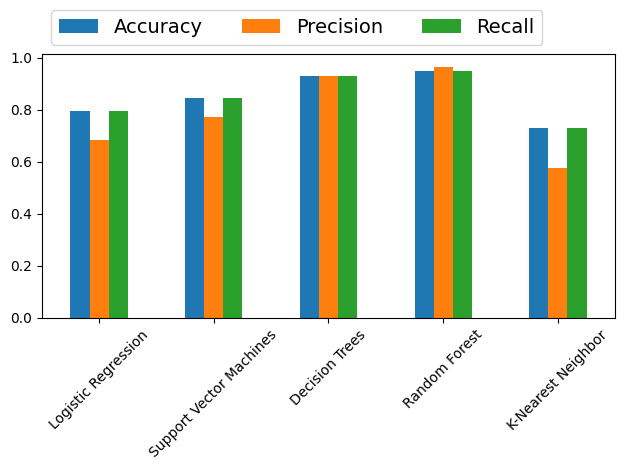

In [ ]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

#Sleeplessness

In [ ]:
raw_ind_df = temp.copy()

In [ ]:
raw_ind_df['Individual'] = raw_ind_df['Any recurring health issues (choose all that apply)'].str.contains('Sleeplessness', case=False, na=False).astype(int)
raw_ind_df.drop(['Any recurring health issues (choose all that apply)'], inplace=True, axis=1)

In [ ]:
new_ind_df= pd.get_dummies(raw_ind_df, columns= features)

X = new_ind_df.drop('Individual', axis = 1).values
y = new_ind_df['Individual']
y = y.astype(int)

dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

fi_col = []
fi = []

for i,column in enumerate(new_ind_df.drop('Individual', axis = 1)):
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])

fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

columns_to_keep = fi_df['Feature'][0:38]

X = new_ind_df[columns_to_keep].values

y = new_ind_df['Individual']
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority")
X_res, y_res = ros.fit_resample(X_train, y_train)

models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():

    # Fit the classifier model
    models[key].fit(X_res, y_res)

    # Prediction
    predictions = models[key].predict(X_test)

    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy,Precision,Recall
Logistic Regression,0.711864,0.333333,0.214286
Support Vector Machines,0.677966,0.333333,0.187500
Decision Trees,0.813559,0.222222,0.333333
Random Forest,0.847458,0.000000,0.000000
K-Nearest Neighbor,0.576271,0.444444,0.166667


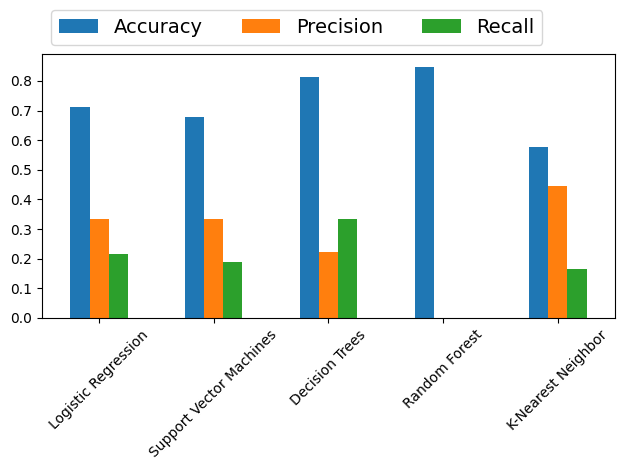

In [ ]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

#Hypertension

In [ ]:
raw_ind_df = temp.copy()

In [ ]:
raw_ind_df['Individual'] = raw_ind_df['Any recurring health issues (choose all that apply)'].str.contains('Hypertension', case=False, na=False).astype(int)
raw_ind_df.drop(['Any recurring health issues (choose all that apply)'], inplace=True, axis=1)

In [ ]:
new_ind_df= pd.get_dummies(raw_ind_df, columns= features)

X = new_ind_df.drop('Individual', axis = 1).values
y = new_ind_df['Individual']
y = y.astype(int)

dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

fi_col = []
fi = []

for i,column in enumerate(new_ind_df.drop('Individual', axis = 1)):
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])

fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

columns_to_keep = fi_df['Feature'][0:38]

X = new_ind_df[columns_to_keep].values

y = new_ind_df['Individual']
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority")
X_res, y_res = ros.fit_resample(X_train, y_train)

models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():

    # Fit the classifier model
    models[key].fit(X_res, y_res)

    # Prediction
    predictions = models[key].predict(X_test)

    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test,average='weighted')
    recall[key] = recall_score(predictions, y_test,average='weighted')

import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy,Precision,Recall
Logistic Regression,0.813559,0.798493,0.813559
Support Vector Machines,0.864407,0.896422,0.864407
Decision Trees,0.915254,1.000000,0.915254
Random Forest,0.915254,1.000000,0.915254
K-Nearest Neighbor,0.830508,0.798619,0.830508


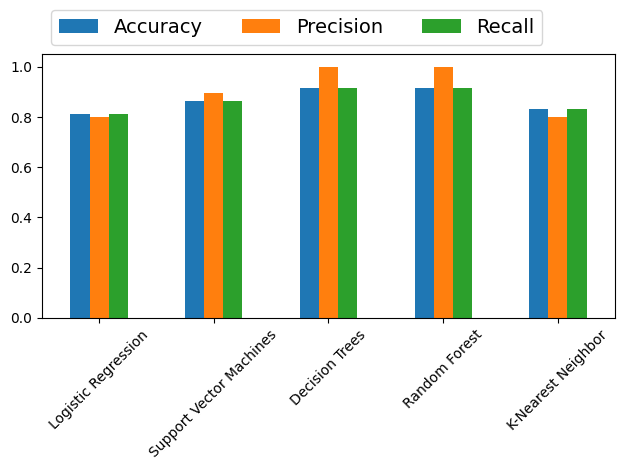

In [ ]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

#Dizziness

In [ ]:
raw_ind_df = temp.copy()

In [ ]:
raw_ind_df['Individual'] = raw_ind_df['Any recurring health issues (choose all that apply)'].str.contains('Dizziness', case=False, na=False).astype(int)
raw_ind_df.drop(['Any recurring health issues (choose all that apply)'], inplace=True, axis=1)

In [ ]:
new_ind_df= pd.get_dummies(raw_ind_df, columns= features)

X = new_ind_df.drop('Individual', axis = 1).values
y = new_ind_df['Individual']
y = y.astype(int)

dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

fi_col = []
fi = []

for i,column in enumerate(new_ind_df.drop('Individual', axis = 1)):
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])

fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

columns_to_keep = fi_df['Feature'][0:38]

X = new_ind_df[columns_to_keep].values

y = new_ind_df['Individual']
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority")
X_res, y_res = ros.fit_resample(X_train, y_train)

models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():

    # Fit the classifier model
    models[key].fit(X_res, y_res)

    # Prediction
    predictions = models[key].predict(X_test)

    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test, average='weighted')
    recall[key] = recall_score(predictions, y_test, average='weighted')

import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy,Precision,Recall
Logistic Regression,0.762712,0.688136,0.762712
Support Vector Machines,0.796610,0.736980,0.796610
Decision Trees,0.847458,0.832049,0.847458
Random Forest,0.932203,1.000000,0.932203
K-Nearest Neighbor,0.779661,0.708783,0.779661


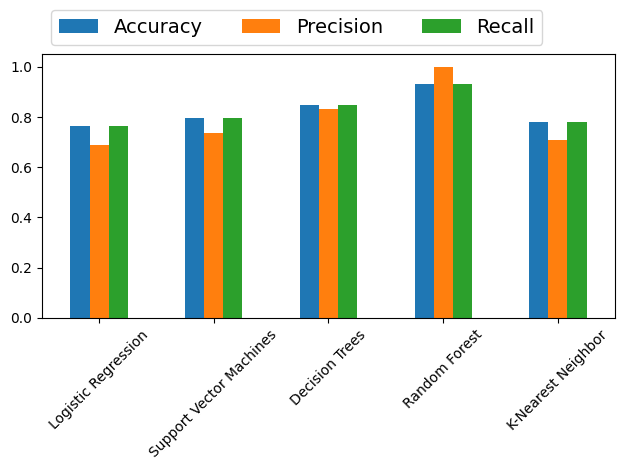

In [ ]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()

#Fatigue

In [ ]:
raw_ind_df = temp.copy()

In [ ]:
raw_ind_df['Individual'] = raw_ind_df['Any recurring health issues (choose all that apply)'].str.contains('Fatigue', case=False, na=False).astype(int)
raw_ind_df.drop(['Any recurring health issues (choose all that apply)'], inplace=True, axis=1)

In [ ]:
new_ind_df= pd.get_dummies(raw_ind_df, columns= features)

X = new_ind_df.drop('Individual', axis = 1).values
y = new_ind_df['Individual']
y = y.astype(int)

dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

fi_col = []
fi = []

for i,column in enumerate(new_ind_df.drop('Individual', axis = 1)):
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])

fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

columns_to_keep = fi_df['Feature'][0:38]

X = new_ind_df[columns_to_keep].values

y = new_ind_df['Individual']
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority")
X_res, y_res = ros.fit_resample(X_train, y_train)

models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():

    # Fit the classifier model
    models[key].fit(X_res, y_res)

    # Prediction
    predictions = models[key].predict(X_test)

    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test, average='weighted')
    recall[key] = recall_score(predictions, y_test, average='weighted')

import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.627119,0.568362,0.627119
Support Vector Machines,0.610169,0.549266,0.610169
Decision Trees,0.728814,0.757966,0.728814
Random Forest,0.830508,0.916836,0.830508
K-Nearest Neighbor,0.661017,0.617702,0.661017


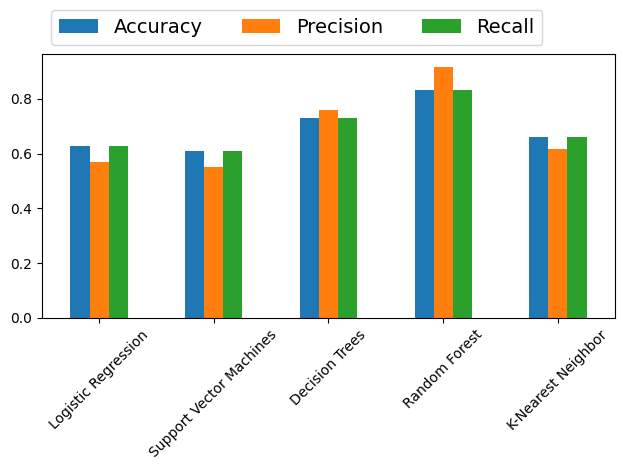

In [ ]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()